# Olist : clusterisation et maintenance

In [25]:
#librairies import

import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('data/olist_customers_whole.csv')

In [32]:
data.head()

,customer_unique_id,first_purchase,last_purchase,total_orders,total_spent,average_review_score,all_comments,total_price_items,total_freight_value,product_categories,seller_cities,order_statuses
0,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05-15 23:30:03,2018-08-20 19:14:26,17,927.63,NaN,NaN,729.62,172.42,"construcao_ferramentas_ferramentas, esporte_la...","campinas, curitiba, joinville, londrina, sao j...","delivered, shipped, unavailable"
1,3e43e6105506432c953e165fb2acf44c,2017-09-18 18:53:15,2018-02-27 18:36:39,9,1963.58,NaN,NaN,1000.85,171.82,"cama_mesa_banho, casa_construcao, informatica_...","ibitinga, jaguariuna, porto alegre, rio de jan...",delivered
2,6469f99c1f9dfae7733b25662e7f1782,2017-09-19 01:02:44,2018-06-28 00:43:34,7,973.09,NaN,NaN,664.20,94.63,cama_mesa_banho,"ibitinga, piracicaba, sao paulo",delivered
3,ca77025e7201e3b30c44b472ff346268,2017-10-09 12:34:39,2018-06-01 11:38:29,7,2126.44,NaN,NaN,806.61,316.11,"cama_mesa_banho, cool_stuff, moveis_decoracao,...","ibitinga, pedreira, sao paulo",delivered
4,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-13 16:44:41,2018-02-14 13:22:12,7,1386.54,NaN,NaN,855.21,165.91,"beleza_saude, moveis_decoracao, papelaria, per...","formiga, itajai, mogi das cruzes, pedreira, sa...",delivered


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_unique_id    96096 non-null  object        
 1   first_purchase        96096 non-null  datetime64[ns]
 2   last_purchase         96096 non-null  datetime64[ns]
 3   total_orders          96096 non-null  int64         
 4   total_spent           96095 non-null  float64       
 5   average_review_score  279 non-null    float64       
 6   all_comments          120 non-null    object        
 7   total_price_items     95420 non-null  float64       
 8   total_freight_value   95420 non-null  float64       
 9   product_categories    94107 non-null  object        
 10  seller_cities         95420 non-null  object        
 11  order_statuses        96096 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 8.8+ M

In [ ]:
#needs to translate last_purchase into datetime for later use
columns_to_translate_into_datetime = ['last_purchase', 'first_purchase']

data[columns_to_translate_into_datetime] = data[columns_to_translate_into_datetime].apply(pd.to_datetime)

In [137]:
#How many different product categories are there
pc = data['product_categories']
pc.nunique()

668

<function matplotlib.pyplot.show(close=None, block=None)>

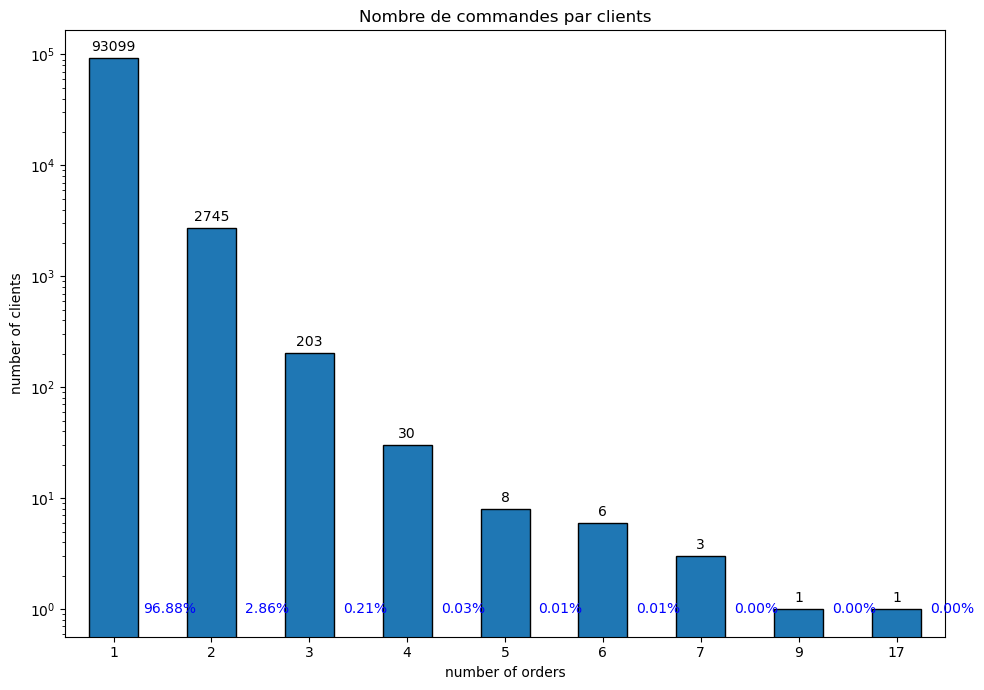

In [219]:
#plotting the number of orders by clients
fig = plt.figure(figsize=(10, 7))
x = data['total_orders'].value_counts().sort_index()
total = x.sum()
ax = x.plot(kind='bar', edgecolor='black')

for xaxis, yaxis in enumerate(x):
    ax.annotate(str(yaxis), xy=(xaxis, yaxis),  xytext=(0, 5), textcoords='offset points', ha='center')

for xaxis, yaxis in enumerate(x):
    percentage = (yaxis / total) * 100
    ax.annotate(f'{percentage:.2f}%', xy=(xaxis, 1),  xytext=(40, 5), textcoords='offset points', ha='center', va='top', fontsize=10, color='blue')

plt.yscale('log')
plt.xlabel('number of orders')
plt.xticks(rotation=0)
plt.ylabel('number of clients')
plt.title('Nombre de commandes par clients')
plt.tight_layout()

plt.show

On constate qu'à peine plus que 3% des clients on fait plus qu'une seule commande

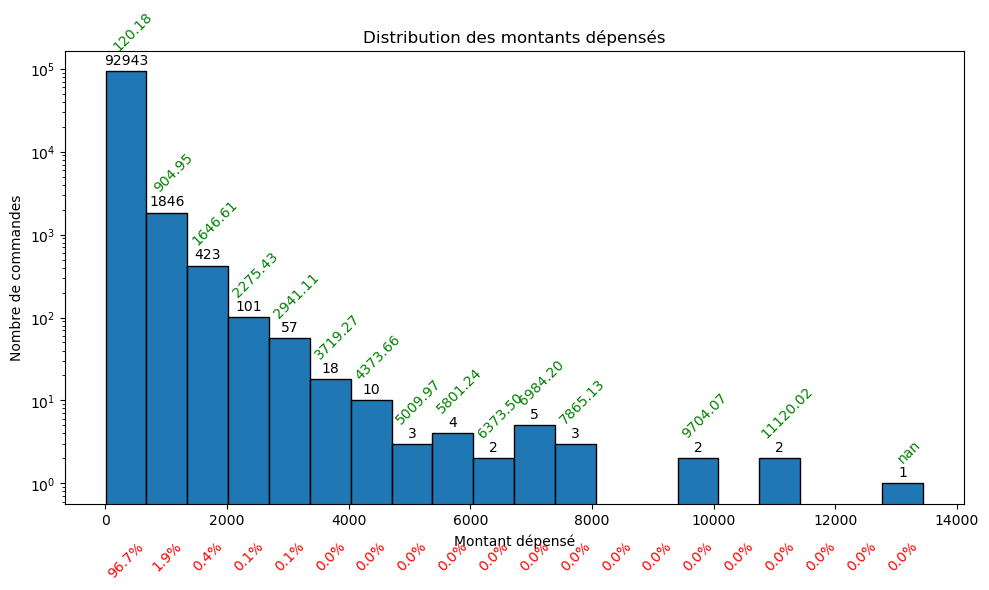

In [223]:
#Plotting the amount spent distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['total_price_items'], bins=20, edgecolor='black')

#Amount of clients in each bins
for count, bin_edge in zip(n, bins[:-1]):
    if count > 0:  #only for non-empty bins
        plt.annotate(f'{int(count)}', xy=(bin_edge + (bins[1] - bins[0])/2, count), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

#Mean amount spent in each bin
bin_indices = np.digitize(data['total_price_items'], bins)
bin_means = [data['total_price_items'][bin_indices == i].mean() for i in range(1, len(bins))]

#Annotate mean amount spent in each bin
for bin_mean, bin_center in zip(bin_means, bin_centers):
    plt.annotate(f'{bin_mean:.2f}', xy=(bin_center, n[np.where(bin_centers == bin_center)][0]), xytext=(5, 15), textcoords='offset points', ha='center', fontsize=10, color='green', rotation=45)

#Client percentage in each bins
total_clients = len(data)
for count, bin_center in zip(n, bin_centers):
    percentage_clients = (count / total_clients) * 100
    plt.annotate(f'{percentage_clients:.1f}%', xy=(bin_center, 1), xytext=(0, -40), textcoords='offset points', ha='center', va='top', fontsize=10, color='red', rotation=45)

plt.xlabel('Montant dépensé')
plt.ylabel('Nombre de commandes')
plt.yscale('log')
plt.title('Distribution des montants dépensés')
plt.tight_layout()
plt.show()

96.7% des clients ont un panier moyen de 120 Reals

### RFM : Récence Fréquence Montant

In [208]:
#Recence
from datetime import datetime
#calculate the time since last seen
current_date = pd.to_datetime(datetime.now().date()) #maybe not use the current date but last date of DB update ('2021-10-01')
data['days_since_last_purchase'] = (current_date - data['last_purchase']).dt.days 

# Insert the new column after the last_seen column
last_purchase_index = data.columns.get_loc('last_purchase')
data.insert(last_purchase_index + 1, 'days_since_last_purchase', data.pop('days_since_last_purchase'))

data.head()

,customer_unique_id,first_purchase,last_purchase,days_since_last_purchase,total_orders,total_spent,average_review_score,all_comments,total_price_items,total_freight_value,product_categories,seller_cities,order_statuses
0,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05-15 23:30:03,2018-08-20 19:14:26,2103,17,927.63,NaN,NaN,729.62,172.42,"construcao_ferramentas_ferramentas, esporte_la...","campinas, curitiba, joinville, londrina, sao j...","delivered, shipped, unavailable"
1,3e43e6105506432c953e165fb2acf44c,2017-09-18 18:53:15,2018-02-27 18:36:39,2277,9,1963.58,NaN,NaN,1000.85,171.82,"cama_mesa_banho, casa_construcao, informatica_...","ibitinga, jaguariuna, porto alegre, rio de jan...",delivered
2,6469f99c1f9dfae7733b25662e7f1782,2017-09-19 01:02:44,2018-06-28 00:43:34,2156,7,973.09,NaN,NaN,664.20,94.63,cama_mesa_banho,"ibitinga, piracicaba, sao paulo",delivered
3,ca77025e7201e3b30c44b472ff346268,2017-10-09 12:34:39,2018-06-01 11:38:29,2183,7,2126.44,NaN,NaN,806.61,316.11,"cama_mesa_banho, cool_stuff, moveis_decoracao,...","ibitinga, pedreira, sao paulo",delivered
4,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-13 16:44:41,2018-02-14 13:22:12,2290,7,1386.54,NaN,NaN,855.21,165.91,"beleza_saude, moveis_decoracao, papelaria, per...","formiga, itajai, mogi das cruzes, pedreira, sa...",delivered


Features RFM retenues : 
- last_purchase = Récence
- days_since_last_purchase = Fréquence
- total_item_price = Montant